In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [9]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [10]:
#drop month,day and year
df.drop(['month','day','year'],axis=1,inplace=True)

In [11]:
#encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [12]:
##independent and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [13]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
#feature selection or standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


# linear regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
reg=LinearRegression()
reg.fit(X_train_scaled,y_train)
y_pred=reg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean above error",mae)
print("R2 score",r2)

Mean above error 0.48152219066237373
R2 score 0.9895932251802456


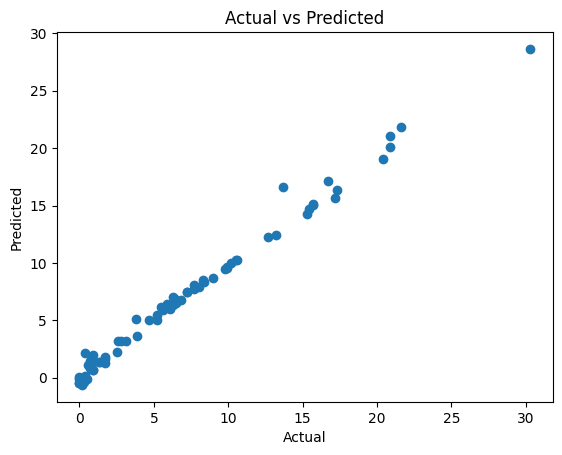

In [19]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## lasso regression

Mean above error 1.074283266468391
R2 score 0.956696474573154


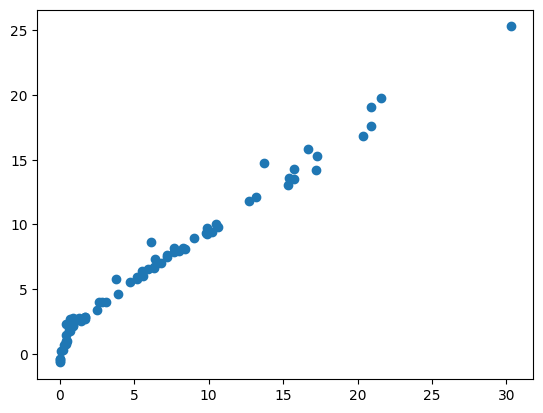

In [21]:
## Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean above error",mae)
print("R2 score",r2)
plt.scatter(y_test,y_pred)


# ridge regression

Mean above error 0.5164156257981363
R2 score 0.9874739721743631


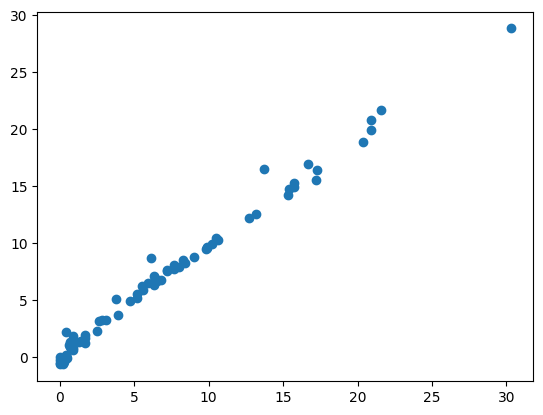

In [25]:
## Ridge Regression
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean above error",mae)
print("R2 score",r2)
plt.scatter(y_test,y_pred)

## elasticnet regression

Mean above error 1.6640624890476703
R2 score 0.9026520903893147


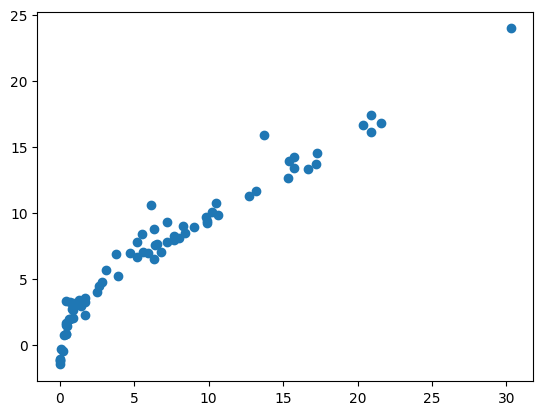

In [26]:
## Elastic Net
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean above error",mae)
print("R2 score",r2)
plt.scatter(y_test,y_pred)

## 125. Hyperparameter tuning

# cross validation lasso

In [30]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)



LassoCV(cv=5)

In [31]:
lassocv.predict(X_test_scaled)

array([ 8.20919701e+00,  7.34032953e+00, -4.58792283e-02,  5.39886470e+00,
        6.62813792e+00,  1.63062433e+00,  2.46436077e+00,  7.28136288e+00,
        2.04680191e+00,  3.32027094e+00,  4.30750335e-01,  8.13790383e+00,
        9.43502684e+00,  1.63969039e+01,  1.88771525e+01,  1.59375945e+00,
        1.58064213e+00, -6.58796938e-01,  6.84849208e+00,  3.10851782e+00,
        1.82815390e+00,  2.24465633e-01,  6.27114757e+00,  7.00025911e-03,
        2.09009767e+01,  4.86336190e+00,  5.75173710e+00,  9.88792071e+00,
       -7.28602012e-01,  9.88672610e+00,  6.47217952e+00, -1.79370213e-01,
        1.02396748e+01,  1.49038220e+01,  1.53502508e+00,  9.83013386e-01,
        1.87001830e+00,  5.96422272e+00, -4.36625232e-01, -3.36972365e-01,
        6.79665832e+00,  1.75336288e+00,  8.19205205e+00, -8.54497875e-01,
        1.51547014e+01,  7.92232773e+00,  8.01855566e+00,  1.01285667e+00,
        1.26444881e+01,  9.46117709e-01,  2.83370725e+01,  5.37781173e+00,
        1.70981800e+01,  

In [33]:
lassocv.alphas_

array([7.1027424 , 6.62404134, 6.17760312, 5.76125335, 5.37296415,
       5.01084435, 4.67313021, 4.35817688, 4.06445034, 3.79051999,
       3.53505163, 3.29680098, 3.07460763, 2.86738937, 2.67413692,
       2.49390904, 2.32582792, 2.1690749 , 2.02288651, 1.88655073,
       1.75940353, 1.64082562, 1.53023946, 1.42710644, 1.33092425,
       1.24122441, 1.15757004, 1.07955369, 1.00679538, 0.93894074,
       0.87565928, 0.81664278, 0.76160379, 0.71027424, 0.66240413,
       0.61776031, 0.57612533, 0.53729642, 0.50108444, 0.46731302,
       0.43581769, 0.40644503, 0.379052  , 0.35350516, 0.3296801 ,
       0.30746076, 0.28673894, 0.26741369, 0.2493909 , 0.23258279,
       0.21690749, 0.20228865, 0.18865507, 0.17594035, 0.16408256,
       0.15302395, 0.14271064, 0.13309242, 0.12412244, 0.115757  ,
       0.10795537, 0.10067954, 0.09389407, 0.08756593, 0.08166428,
       0.07616038, 0.07102742, 0.06624041, 0.06177603, 0.05761253,
       0.05372964, 0.05010844, 0.0467313 , 0.04358177, 0.04064

In [34]:
lassocv.coef_

array([-0.00000000e+00, -3.88014795e-03, -0.00000000e+00,  3.98029063e-03,
       -4.78143799e-01,  1.19686411e+00,  0.00000000e+00,  4.94117233e+00,
        2.46308071e+00,  7.98220180e-02, -8.84419166e-02])

In [35]:
lassocv.mse_path_

array([[50.65386968, 76.54197718, 42.60540011, 85.19903601, 37.22447771],
       [44.75111814, 74.82132255, 38.341692  , 85.19903601, 33.05643554],
       [39.36934038, 67.35349762, 32.91718118, 77.16947646, 28.98441557],
       [34.66809152, 60.76849885, 28.30179163, 70.00628728, 25.07891899],
       [30.56005987, 54.39656706, 24.38332378, 63.69553448, 21.70030699],
       [26.96916466, 47.86216351, 21.06462063, 58.13161794, 18.77862509],
       [23.82945553, 42.15575307, 18.26138649, 53.22232605, 16.25301222],
       [21.08318369, 37.17090521, 15.90095328, 46.89293347, 14.07124316],
       [18.68014904, 32.81473426, 13.92043855, 41.32635877, 12.18732916],
       [16.57661964, 29.00744813, 12.26540003, 36.4658746 , 10.56155236],
       [14.73438066, 25.67846082, 10.88893934, 32.22081976,  9.15943046],
       [13.12047322, 22.76665973,  9.75047302, 28.5122238 ,  7.95103045],
       [11.70583482, 20.21881242,  8.81511714, 25.27132199,  6.9102242 ],
       [10.46524798, 17.98854548,  8.0

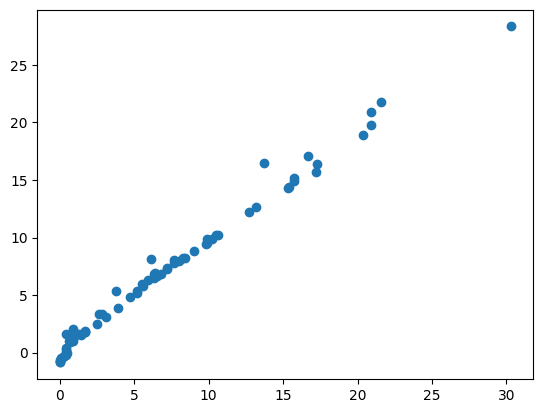

In [37]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)

Mean above error 0.7304176882753413
R2 score 0.9783442343657992


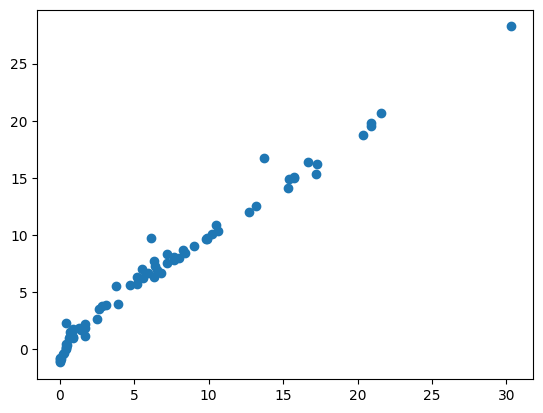

In [40]:
from sklearn.linear_model import RidgeCV
riedgecv=RidgeCV(cv=5)
riedgecv.fit(X_train_scaled,y_train)
y_pred=riedgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean above error",mae)
print("R2 score",r2)

In [43]:
riedgecv.alphas

(0.1, 1.0, 10.0)

In [45]:
riedgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

Mean above error 0.6183882578710898
R2 score 0.983304982929284


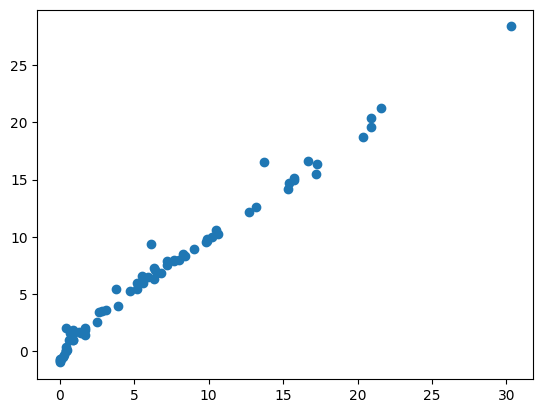

In [46]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv=ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,y_train)
y_pred=elasticnetcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean above error",mae)
print("R2 score",r2)